In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from IPython.display import clear_output
from time import sleep

%matplotlib inline

In [2]:
cmap_bold = ListedColormap(["#FF0000", '#00FF00',"#0000FF"])
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB','#BBBBFF'])

## Activation and Helper Functions

In [3]:
def linear(H):
    return H

In [4]:
def Relu(H): # H because it is a hypothesis 
    return H*(H>0) # zero is h is not postive, 1 if it is positive 
# This is the logit sample 

# if your input is continuous, but the output needs to be discrete, you use relu 

In [5]:
def sigmoid(H):
    return 1/(1+ np.exp(-H))

In [6]:
def softmax(H): # if mode is zero
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

In [7]:
def cross_entropy(Y,P_hat):
    return -(1/len(Y))*np.sum(Y*np.log(P_hat))

In [8]:
def OLS(Y,Y_hat):
    return (1/(2*len(Y)))*np.sum((Y- Y_hat)**2)

In [9]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i, y[i]] = 1
    
    return Y
    

In [10]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [11]:
def R2(y,y_hat):
    return 1- np.sum((y-y_hat)**2)/np.sum((y - y.mean())**2)

In [40]:
def derivative(Z,a):
    if a == linear:
        return 1
    
    elif a == sigmoid:
        return Z*(1-Z)
    
    elif a == np.tanh:
        return 1-Z*Z
    
    elif a == Relu:
        return (Z>0).astype(int)
    
    else:
        ValueError("Unknown Activation Function Dude!")

In [41]:
class ANN():
    def __init__(self, architecture, activations = None, mode = 0):
        self.mode = mode
        self.architecture = architecture
        self.activations = activations
        self.L = len(architecture)+1
        
    
    # creating Fit
    
    def fit(self,X,y, eta= 1e-3, epochs = 1e3, show_curve = False):
        epochs = int(epochs)
        
        if self.mode: 
            Y = y
        else: 
            Y= one_hot_encode(y)
    
        N,D = X.shape
        K = Y.shape[1]
        
        
        #
        #
        # weights and bias initializaitions (random) 
        #
        #
    
        self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D] + self.architecture),(self.architecture +[K])),1)}
    
        self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture + [K],1)}
    
        #
        #
        # activation funtion
        #
        #
        
        if self.activations is None: 
            self.a = {l: Relu for l in range(1,self.L)}
        else:
            self.a = {l: act for l, act in enumerate(self.activations,1)}
        #
        #
        # Mode Set
        # output layer
        #
        #
        
        if self.mode:
            self.a[self.L] = linear
        else:
            self.a[self.L] = softmax
        
        #
        #
        # objective function
        # value ....something
        #
        #
        J = np.zeros(epochs)
    
        # Gradient Descent
    
        for epoch in range(epochs):
        
            self.forward(X)
        
            if self.mode:
                J[epoch] = OLS(Y,  self.Z[self.L])
            else:
                J[epoch] = cross_entropy(Y, self.Z[self.L])
        
            dH = (1/N)*(self.Z[self.L]-Y)
            
            #
            #
            # weight and bias update rules
            #
            #
            
            for l in sorted(self.W.keys(), reverse = True):
            
                dW = self.Z[l-1].T@dH
            
                db = dH.sum(axis = 0) #diferential elements
            
                self.W[l] -= eta*dW
            
                self.b[l] -= eta*db
            
                if  l >1:
                
                    dZ = dH@self.W[l].T
                
                    dH = dZ*derivative(self.Z[l-1], self.a[l-1])
        
                    
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()
            
    def forward(self,X):
        self.Z = {0:X}
        
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+ self.b[l])
            
    def predict(self,X):
        self.forward(X)
        
        if self.mode:
            return self.Z[self.L] # returning the last thing in the network
        
        # that means that if this is a regression
        else:
            return self.Z[self.L].argmax(axis = 1) # per node... 
    
    
    
    
    

In [48]:
def main():
    D = 2
    K = 3
    N = int(K*1e3)
    
    #data = pd.read_csv('TrippleGauss.csv',header = 0)
    
    X0 = np.random.randn((N//K),D) + np.array([2, 2])
    X1 = np.random.randn((N//K),D) + np.array([0, -2])
    X2 = np.random.randn((N//K),D) + np.array([-2, 2])
    X = np.vstack((X0, X1,X2))

    y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))
    #X = data.to_numpy()

    #y = data['2'].to_numpy()
    #X = data[['0','1']].to_numpy()
    
    
    model = ANN([8,8,8], [Relu,np.tanh,np.tanh])
    model.fit(X,y,eta = 3e-2, epochs = 2e3, show_curve= True)
    y_hat = model.predict(X)
    
    print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")
    
    x1 = np.linspace(X[:,0].min() - 1, X[:,0].max(), 1000)
    x2 = np.linspace(X[:,1].min() - 1, X[:,1].max(), 1000)
    
    xx1,xx2 = np.meshgrid(x1,x2)
    
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(*xx1.shape)
    
    plt.figure()
    plt.pcolormesh(xx1,xx2,Z,cmap=cmap_light)# could use for 4d data... 
    plt.scatter(X[:,0],X[:,1],c=y, cmap=cmap_bold)
    #plt.title('Data')
    
    #plt.figure()
    #plt.scatter(X[:,0],X[:,1],c=y_hat, cmap=cmap_bold, alpha = .8)
    plt.title('Prediction')

    
    
    

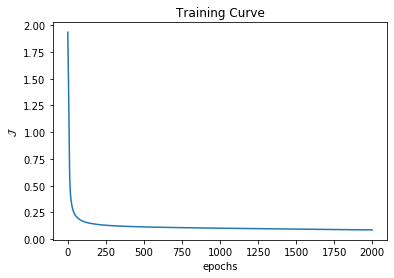

Training Accuracy: 0.9707


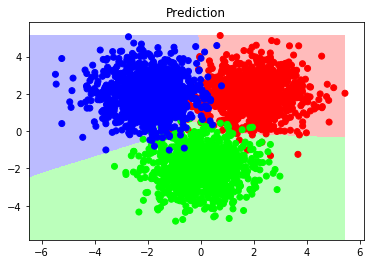

In [49]:
if __name__ =='__main__':
    main()

In [50]:
def main_reg():
    N = 100
    
    X = np.linspace(0, 15, N).reshape(N, 1)
    y = 3.045 + 7.876*np.sqrt(X) + 7.1834*np.exp(-0.2*(X - 7)**2) - 12.045*np.exp(-1.5*(X - 11)**2) + np.random.randn(N, 1)*0.7
    
    myann = ANN(mode = 1, architecture = [12, 12, 12, 12, 12, 12], activations = [np.tanh]*6)
    myann.fit(X, y, eta = 8e-5, epochs = 2e5, show_curve = True)
    y_hat = myann.predict(X)
    
    plt.figure()
    plt.scatter(X, y)
    plt.plot(X, y_hat, color = "#FF0044", linewidth = 1.5)

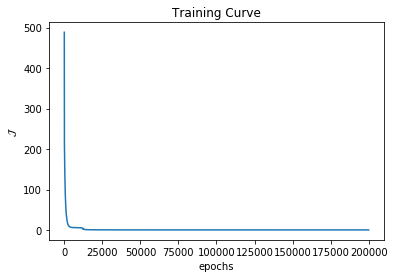

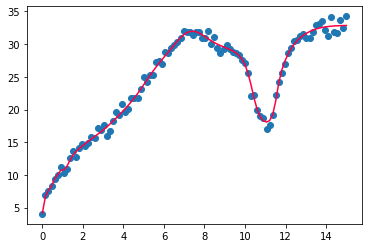

In [52]:
if __name__ == "__main__":
    main_reg()